In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Build the dataset
### Make the original data

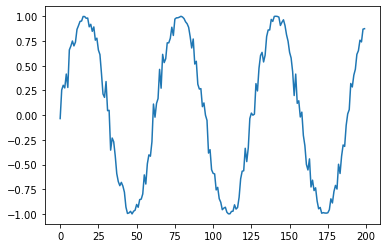

In [3]:
series = np.sin(0.1*np.arange(200)+ np.random.randn(200)*0.1) #+ np.random.randn(200)*0.1

# Plot it
plt.plot(series)

### lets see if we cn use T past values to predict the next value


In [4]:
T = 10
X = []
Y = []
for t in range(len(series) -T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T, 1)
Y = np.array(Y)
N = len(X)
print("X.shape",X.shape,"Y.shape",Y.shape)

X.shape (190, 10, 1) Y.shape (190,)


# Simple RNN model


In [5]:
i = Input(shape=(T,1))
x = SimpleRNN(5, activation = None)(i)
x = Dense(1)(x)
model = Model(i,x)
model.compile(
    loss="mse",
    optimizer=Adam(learning_rate=0.1),
)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 1)]           0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 5)                 35        
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


# train the RNN

In [6]:

r = model.fit(
    X[:-N//2],Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:],Y[-N//2:]),
)

Epoch 1/80
3/3 [==============================] - 1s 111ms/step - loss: 2.9635 - val_loss: 0.1596
Epoch 2/80
3/3 [==============================] - 0s 28ms/step - loss: 0.1735 - val_loss: 0.1751
Epoch 3/80
3/3 [==============================] - 0s 30ms/step - loss: 0.1635 - val_loss: 0.1218
Epoch 4/80
3/3 [==============================] - 0s 28ms/step - loss: 0.1007 - val_loss: 0.0536
Epoch 5/80
3/3 [==============================] - 0s 27ms/step - loss: 0.0729 - val_loss: 0.0833
Epoch 6/80
3/3 [==============================] - 0s 29ms/step - loss: 0.0607 - val_loss: 0.0411
Epoch 7/80
3/3 [==============================] - 0s 29ms/step - loss: 0.0456 - val_loss: 0.0282
Epoch 8/80
3/3 [==============================] - 0s 27ms/step - loss: 0.0403 - val_loss: 0.0476
Epoch 9/80
3/3 [==============================] - 0s 28ms/step - loss: 0.0462 - val_loss: 0.0653
Epoch 10/80
3/3 [==============================] - 0s 29ms/step - loss: 0.0346 - val_loss: 0.0141
Epoch 11/80
3/3 [===========

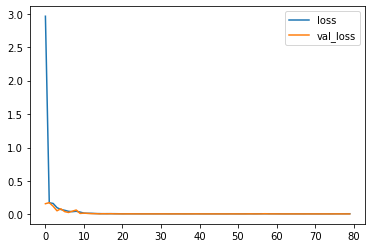

In [7]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.legend(['loss', 'val_loss'])

### Forecast future values (use only self-predictions for making predictions)


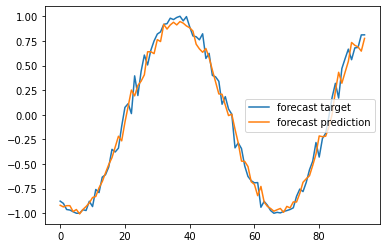

In [42]:

validation_target = Y[-N//2:]
validation_predictions = []

# last train input
i = -N//2 #!-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1,-1,1))[0,0] #1x1 array => scalar
  i += 1
  # update the predictions list
  validation_predictions.append(p)



plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

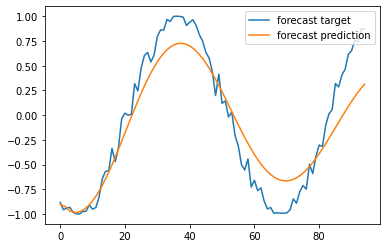

In [8]:
#Forecast future values (use only self-predictions for making predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] #!-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0] #1x1 array => scalar

  # update the predictions list
  validation_predictions.append(p)

  # make the new input
  last_x = np.roll(last_x,-1)
  last_x[-1] = p
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

# Things we should know and memorize

- N = number of samples
- T = sequence length
- D = number of input features
- K = number of output units (neurons)

we make data and build the model when we see explicitly the shapes


In [21]:
# Make some data
N = 1
T = 10
D = 3
K = 2
X = np.random.randn(N, T, D)
# Make an RNN

M = 5 # number of hidden units

i = Input(shape=(T,D))
x1 = SimpleRNN(M)(i)
o = Dense(K)(x1)

model = Model(i,o)
# Get the output
Yhat = model.predict(X)
print(Yhat)
print('Yhat.shape', Yhat.shape)

[[ 0.23248696 -0.14773834]]
Yhat.shape (1, 2)


In [23]:
# see if we can replicate this output
# get the weights first
model.summary()



Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 10, 3)]           0         
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 5)                 45        
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 12        
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [24]:
# see what's returned
model.layers[1].get_weights()



[array([[-0.17939717, -0.2598396 ,  0.11174303,  0.55627006,  0.2335456 ],
        [ 0.3838622 ,  0.34853822,  0.8139301 , -0.40652382, -0.6928159 ],
        [-0.6397102 ,  0.8161549 ,  0.12421507,  0.3326282 , -0.21710247]],
       dtype=float32),
 array([[-0.0639466 , -0.2228645 ,  0.1998172 , -0.8401562 ,  0.44771984],
        [-0.19187497, -0.15113398,  0.809026  ,  0.42201352,  0.32821333],
        [ 0.95018137,  0.10844019,  0.10411485,  0.06500083,  0.26519993],
        [ 0.16680723, -0.9539074 , -0.12080406,  0.11166966, -0.18754286],
        [-0.16859849, -0.07610115, -0.5292603 ,  0.31519398,  0.765715  ]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32)]

In [25]:
# Check their shapes
# Should make sense
# First output is input > hidden
# Second output is hidden > hidden
# Third output is bias term (vector of length M)
a,b,c = model.layers[1].get_weights()
print(a.shape,b.shape,c.shape)

(3, 5) (5, 5) (5,)


In [26]:
Wx,Wh,bh = model.layers[1].get_weights()
Wo,bo = model.layers[2].get_weights()
# we manualy calculate the output
h_last = np.zeros(M) # initial hidden state
x = X[0] # the one and only sample
Yhats = [] # where we store the outputs

for t in range(T):
  h = np.tanh(x[t].dot(Wx)+h_last.dot(Wh)+bh)
  y = h.dot(Wo)+bo # we only care about this value on the last iteration
  Yhats.append(y)
  #important: assign h to h_last
  h_last = h

#print the final output and confirm
print(Yhats[-1])

[ 0.23248697 -0.14773825]
